In [1]:
import gudhi.simplex_tree
import numpy as np

from itertools import combinations
from gudhi import AlphaComplex

In [2]:
def generate_new_points(count: int):
    x = np.random.random(count)
    y = np.random.random(count)
    return list(zip(x, y))

In [3]:
def get_boundary_matrix(filtration) -> np.ndarray:
    element_index = dict()
    boundary_matrix = np.zeros([len(filtration), len(filtration)], dtype=np.int8)
    for i, (simplex, _) in enumerate(filtration):
        element_index[tuple(simplex)] = i
        borders = list(combinations(simplex, len(simplex)-1))
        
        for border in borders:
            border = tuple(border)
            if border not in element_index:
                continue
            else:
                index = element_index[border]
                boundary_matrix[index, i] = 1
    
    return boundary_matrix

In [4]:
def find_lowest_nonzero_in_column(boundary_matrix, col):
    # Extract the column
    column = boundary_matrix[:, col]
    
    # Find the indices of non-zero entries
    non_zero_indices = np.nonzero(column)[0]
    
    if len(non_zero_indices) == 0:
        return None  # If no non-zero entries, return None
    else:
        return np.max(non_zero_indices)

In [5]:
points = generate_new_points(5)
alpha_complex: gudhi.alpha_complex = AlphaComplex(points=points)
tree: gudhi.simplex_tree.SimplexTree = alpha_complex.create_simplex_tree()

In [6]:
print(tree.persistence())

[(1, (0.07179228757941478, 0.07647890649633118)), (1, (0.14975974934906633, 0.15126676694237512)), (1, (0.11233512026496431, 0.11237630453887658)), (0, (0.0, inf)), (0, (0.0, 0.07605247588326537)), (0, (0.0, 0.05279861326465908)), (0, (0.0, 0.042426066212609775)), (0, (0.0, 0.038350403656916554))]


In [7]:
filtration = list(tree.get_filtration())
boundary_matrix = get_boundary_matrix(filtration)
persistence = [(0, (0, np.inf))]

prev_lowest = dict()
# column reduction
for i in range(boundary_matrix.shape[0]):
    lowest = find_lowest_nonzero_in_column(boundary_matrix, i)
    if lowest is None:
        continue
    while lowest in prev_lowest:
        boundary_matrix[:, i] ^= boundary_matrix[:, prev_lowest[int(lowest)]]
        lowest = find_lowest_nonzero_in_column(boundary_matrix, i)
        if lowest is None:
            break
    prev_lowest[lowest] = i

# read the result
for i in range(boundary_matrix.shape[0]):
    lowest = find_lowest_nonzero_in_column(boundary_matrix, i)
    if lowest is None:
        continue
    dim = len(filtration[i][0]) - 2
    start = filtration[lowest][1]
    end = filtration[i][1]
    if start != end:
        persistence.append((dim , (start, end)))
persistence.sort(key=lambda x: (x[0], -x[1][0], -x[1][1]))

In [15]:
filtration

[([0], 0.0),
 ([1], 0.0),
 ([2], 0.0),
 ([3], 0.0),
 ([4], 0.0),
 ([2, 3], 0.038350403656916554),
 ([3, 4], 0.042426066212609775),
 ([1, 3], 0.05279861326465908),
 ([1, 4], 0.07179228757941478),
 ([0, 2], 0.07605247588326537),
 ([1, 3, 4], 0.07647890649633118),
 ([0, 3], 0.11233512026496431),
 ([0, 2, 3], 0.11237630453887658),
 ([0, 1], 0.14975974934906633),
 ([0, 1, 3], 0.15126676694237512),
 ([2, 4], 0.439298760359972),
 ([2, 3, 4], 0.439298760359972)]

In [16]:
persistence

[(0, (0, inf)),
 (0, (0.0, 0.07605247588326537)),
 (0, (0.0, 0.05279861326465908)),
 (0, (0.0, 0.042426066212609775)),
 (0, (0.0, 0.038350403656916554)),
 (1, (0.14975974934906633, 0.15126676694237512)),
 (1, (0.11233512026496431, 0.11237630453887658)),
 (1, (0.07179228757941478, 0.07647890649633118))]

<Axes: title={'center': 'Persistence barcode'}>

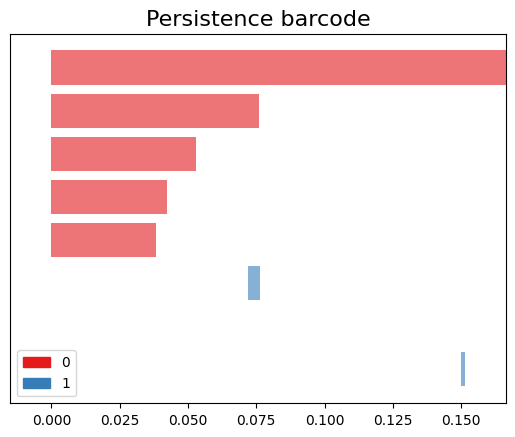

In [17]:
gudhi.plot_persistence_barcode(persistence)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

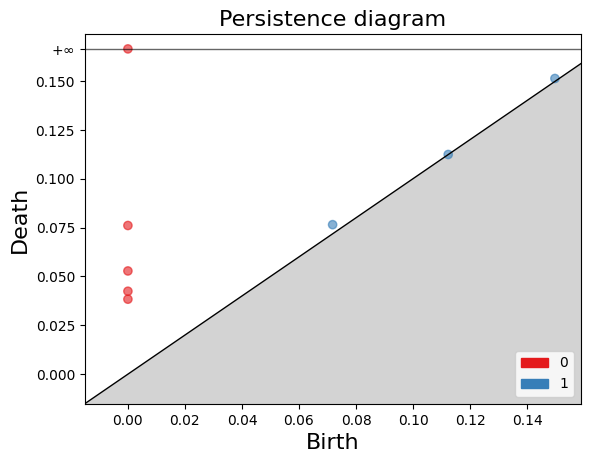

In [18]:
gudhi.plot_persistence_diagram(persistence)

<Axes: title={'center': 'Persistence barcode'}>

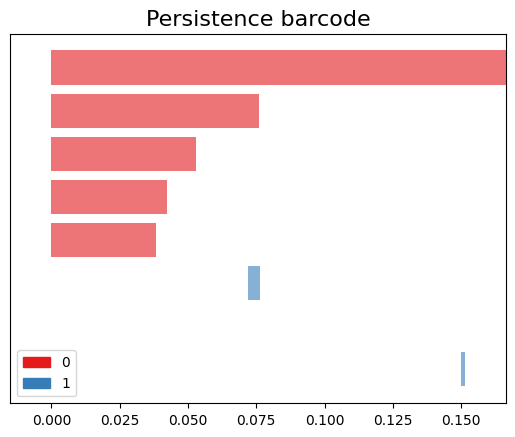

In [19]:
tree.compute_persistence()
gudhi.plot_persistence_barcode(tree.persistence())

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

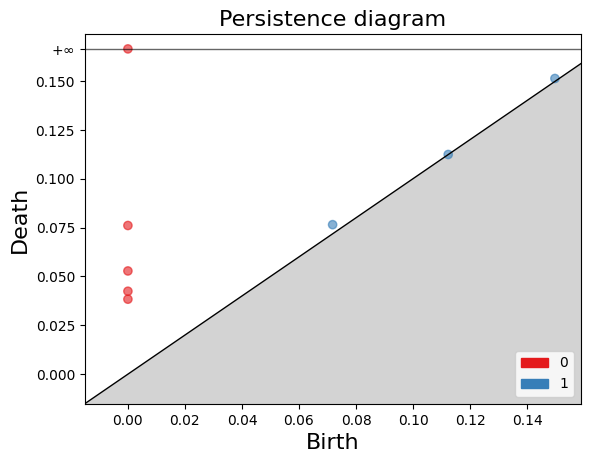

In [20]:
gudhi.plot_persistence_diagram(tree.persistence())


In [13]:
1 ^ 1

0